# cuSignal Cheat Sheets sample code

(c) 2020 NVIDIA, Blazing SQL

Distributed under Apache License 2.0

# Imports

In [1]:
import cusignal
import cupy as cp
from cupy.fft import fft, fftshift
import scipy

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# cuSignal spectral analysis

In [2]:
fs = 10e3

noise_power = 0.001 * fs / 2
data = cp.repeat(cp.array([0,0,2,1,4,0,0,1,0,0,0,0,1]), 10)


fs = 10e3
N = 1e5
amp = 2 * cp.sqrt(2)
noise_power = 0.01 * fs / 2
time = cp.arange(N) / float(fs)
mod = 500*cp.cos(2*cp.pi*0.25*time)
carrier = amp * cp.sin(2*cp.pi*3e3*time + mod)
noise = cp.random.normal(scale=cp.sqrt(noise_power), size=time.shape)
noise *= cp.exp(-time/5)
x = carrier + noise

y = cp.random.normal(scale=0.1*cp.sqrt(noise_power), size=len(x))

#### cusignal.acoustics.cepstrum.complex_cepstrum()

In [3]:
cusignal.complex_cepstrum(x)

(array([   6.75887844,  187.06397521,  140.79994863, ...,   71.17331861,
        -140.87667459, -187.09773898]),
 array([-9427., -9427., -9427., ..., -9427., -9427., -9427.]))

#### cusignal.acoustics.cepstrum.real_cepstrum()

In [4]:
cusignal.real_cepstrum(x)

array([ 6.75887844, -0.01688188, -0.03836298, ...,  0.03505824,
       -0.03836298, -0.01688188])

#### cusignal.spectral_analysis.spectral.coherence()

Text(0, 0.5, 'Coherence')

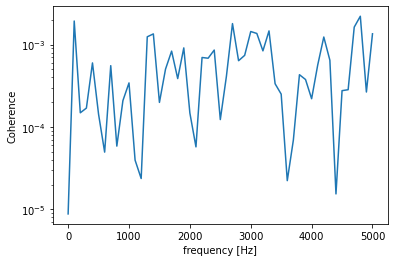

In [5]:
f, Cxy = cusignal.coherence(x, y, fs, nperseg=100)
plt.semilogy(cp.asnumpy(f), cp.asnumpy(Cxy))
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')

#### cusignal.spectral_analysis.spectral.csd()

/opt/conda/envs/rapids/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'CSD')

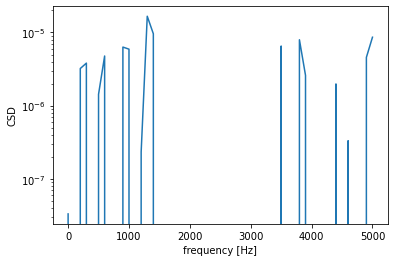

In [6]:
f, Cxy = cusignal.csd(x, y, fs, nperseg=100, window=('kaiser', 5))
plt.semilogy(cp.asnumpy(f), cp.asnumpy(Cxy))
plt.xlabel('frequency [Hz]')
plt.ylabel('CSD')

#### cusignal.spectral_analysis.spectral.lombscargle()

Text(0.5, 0, 'frequency [Hz]')

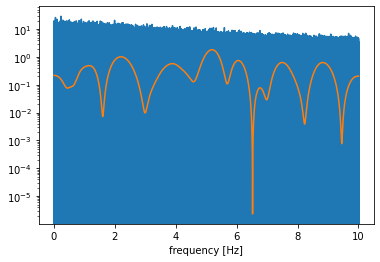

In [7]:
x_signal = cp.linspace(0.01, 10, len(x))
x_period = cp.linspace(0.01, 10, len(x))

periodogram = cusignal.lombscargle(x_signal, y, x_period)
plt.semilogy(cp.asnumpy(x_signal), cp.asnumpy(x))
plt.semilogy(cp.asnumpy(x_period), cp.asnumpy(periodogram))
plt.xlabel('frequency [Hz]')

#### cusignal.spectral_analysis.spectral.periodogram()

Text(0, 0.5, 'PSD [V**2/Hz]')

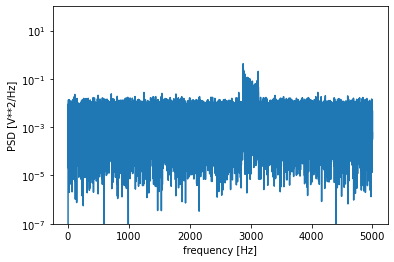

In [8]:
f, Pxx_den = cusignal.periodogram(x, fs)
plt.semilogy(cp.asnumpy(f), cp.asnumpy(Pxx_den))
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')


Text(0, 0.5, 'Linear spectrum [V RMS]')

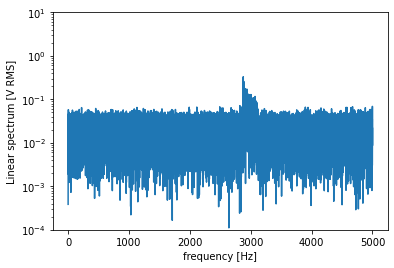

In [9]:
f, Pxx_spec = cusignal.periodogram(x, fs, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(cp.asnumpy(f), cp.asnumpy(cp.sqrt(Pxx_spec)))
plt.ylim([1e-4, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')

#### cusignal.spectral_analysis.spectral.spectrogram()

<ipython-input-10-32ddf46cf3e3>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(cp.asnumpy(t), cp.asnumpy(f), cp.asnumpy(Sxx))


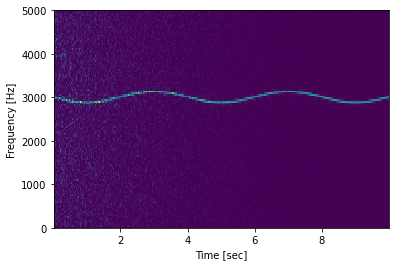

In [10]:
f, t, Sxx = cusignal.spectrogram(x, fs)
plt.pcolormesh(cp.asnumpy(t), cp.asnumpy(f), cp.asnumpy(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.savefig('Spectrogram.png', dpi=150)

<ipython-input-11-13d8d02143a3>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(cp.asnumpy(t), cp.asnumpy(cp.fft.fftshift(f)), cp.asnumpy(cp.fft.fftshift(Sxx, axes=0)))


Text(0.5, 0, 'Time [sec]')

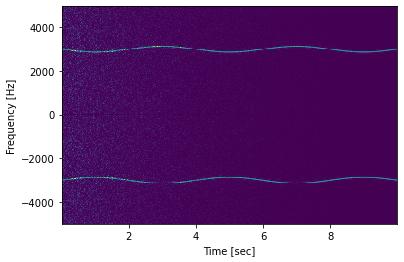

In [11]:
f, t, Sxx = cusignal.spectrogram(x, fs, return_onesided=False)
plt.pcolormesh(cp.asnumpy(t), cp.asnumpy(cp.fft.fftshift(f)), cp.asnumpy(cp.fft.fftshift(Sxx, axes=0)))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

#### cusignal.spectral_analysis.spectral.stft()

<ipython-input-12-415ffd167e0f>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(cp.asnumpy(t), cp.asnumpy(f), cp.asnumpy(cp.abs(Zxx)), \


Text(0.5, 0, 'Time [sec]')

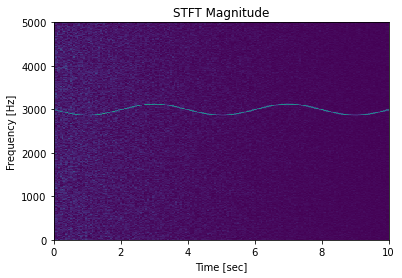

In [12]:
f, t, Zxx = cusignal.stft(x, fs, nperseg=1000)
plt.pcolormesh(cp.asnumpy(t), cp.asnumpy(f), cp.asnumpy(cp.abs(Zxx)), \
    vmin=0, vmax=amp)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

#### cusignal.spectral_analysis.spectral.vectorstrength()

In [13]:
cusignal.vectorstrength(data, 10)

(array(0.80475969), array(0.32113216))

#### cusignal.spectral_analysis.spectral.welch()

Text(0, 0.5, 'PSD [V**2/Hz]')

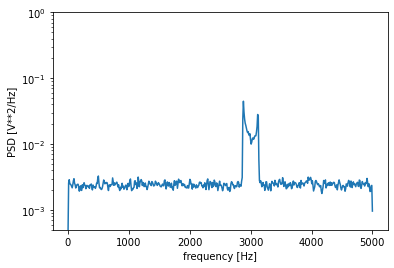

In [14]:
f, Pxx_den = cusignal.welch(x, fs, nperseg=1024)
plt.semilogy(cp.asnumpy(f), cp.asnumpy(Pxx_den))
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')